<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data Preprocessing & Dimensionality Reduction***

###**Tenggat Waktu: 24 September  2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab3_NPM_Nama.ipynb**. Contoh: A_Lab3_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **24 September 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Ezra Pasha Ramadhansyah"
KELAS = "F"
NPM = "2006597872"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Ezra Pasha Ramadhansyah dari kelas F dengan NPM 2006597872, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Ezra Pasha Ramadhansyah)


## **Preprocessing pada Car Price Dataset**

Sumber: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction, dengan beberapa perubahan


### **Variable Descriptions:**

- `CarName`: nama jenis mobil
- `fueltype`: jenis bahan bakar 
- `aspiration`: tipe mesin mobil (naturally aspirated atau turbo)
- `doornumber`: jumlah pintu mobil
- `driverwheel`: sistem kemudi roda mobil
- `carbody`: style mobil
- `enginelocation`: letak mesin mobil
- `wheelbase`: jarak antar roda depan dan roda belakang mobil dalam inch
- `carlenght`: panjang mobil
- `carwidth`: lebar mobil
- `enginetype`: tipe mesin mobil
- `cylindernumber`: jumlah cylinder
- `enginesize`: ukuran mesin
- `fuelsystem`: sistem bahan bakar
- `compressionratio`: rasio kompresi mobil
- `horsepower`: horsepower mobil
- `peakrpm`: batas rpm
- `citympg`: mpg di kota
- `highwaympg`: mpg di highway


Target variable — `price`: harga mobil

### Import Library dan Data

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [4]:
car_df = pd.read_csv('D:\Backup\Kuliah\KASDD files\car1.csv')
car_df


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,dohc,4.0,130,mpfi,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,dohc,4.0,130,mpfi,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,6.0,152,mpfi,9.0,154,5000,19,26,16500.0
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,ohc,4.0,109,mpfi,10.0,102,5500,24,30,13950.0
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,ohc,5.0,136,mpfi,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,plymouth,gas,std,4.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4.0,90,2bbl,9.4,68,5500,31,38,6229.0
156,plymouth,gas,std,4.0,sedan,fwd,front,93.7,167.3,63.8,...,ohc,4.0,90,2bbl,9.4,68,5500,31,38,6692.0
157,subaru,gas,std,4.0,sedan,NaN,NaN,97.2,172.0,65.4,...,ohcf,4.0,108,2bbl,9.5,82,4400,28,33,7775.0
158,subaru,gas,std,4.0,sedan,NaN,NaN,97.2,172.0,65.4,...,ohcf,4.0,108,mpfi,9.0,94,5200,26,32,9960.0


In [5]:
# Mencetak dimensi data
print("data: ", car_df.shape)

data:  (160, 22)


In [6]:
# Membaca kolom-kolom pada DataFrame
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           160 non-null    object 
 1   fueltype          160 non-null    object 
 2   aspiration        155 non-null    object 
 3   doornumber        155 non-null    float64
 4   carbody           155 non-null    object 
 5   drivewheel        152 non-null    object 
 6   enginelocation    151 non-null    object 
 7   wheelbase         159 non-null    float64
 8   carlength         159 non-null    float64
 9   carwidth          159 non-null    float64
 10  carheight         145 non-null    float64
 11  curbweight        17 non-null     float64
 12  enginetype        146 non-null    object 
 13  cylindernumber    146 non-null    float64
 14  enginesize        160 non-null    int64  
 15  fuelsystem        154 non-null    object 
 16  compressionratio  150 non-null    float64
 1

### Deskripsi Statistik

In [7]:
car_df.head().describe()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.800000,94.180000,172.400000,65.260000,51.720000,2548.0,4.600000,131.400000,9.000000,118.600000,5200.000000,20.600000,26.400000,15579.000000
std,1.095445,5.504725,3.957272,1.110405,2.776148,NaN,0.894427,15.420765,0.707107,20.354361,273.861279,2.302173,2.880972,1745.982531
min,2.000000,88.600000,168.800000,64.100000,48.800000,2548.0,4.000000,109.000000,8.000000,102.000000,5000.000000,18.000000,22.000000,13495.000000
25%,2.000000,88.600000,168.800000,64.100000,48.800000,2548.0,4.000000,130.000000,9.000000,111.000000,5000.000000,19.000000,26.000000,13950.000000
50%,2.000000,94.500000,171.200000,65.500000,52.400000,2548.0,4.000000,130.000000,9.000000,111.000000,5000.000000,21.000000,27.000000,16500.000000
75%,4.000000,99.400000,176.600000,66.200000,54.300000,2548.0,5.000000,136.000000,9.000000,115.000000,5500.000000,21.000000,27.000000,16500.000000
max,4.000000,99.800000,176.600000,66.400000,54.300000,2548.0,6.000000,152.000000,10.000000,154.000000,5500.000000,24.000000,30.000000,17450.000000


Dengan method "describe" kita mendapatkan basic statistics untuk atribut numerik. 

Apa yang bisa diamati?
Pada atribut "carlength", standard deviasi tampak rendah, jauh di bawah mean, perlu dilihat lebih jauh distribusi datanya.

In [8]:
# Menampilkan summary dari nonnumeric atribute
display(car_df.head().describe(include=np.object))

C:\Users\DELL\AppData\Local\Temp\ipykernel_14916\229838726.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(car_df.head().describe(include=np.object))


,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
count,5,5,5,5,5,5,5,5
unique,2,1,1,3,3,1,3,1
top,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
freq,3,5,5,2,3,5,2,5


Pada tabel di atas, "unique" menunjukkan ada berapa variasi nilai dalam suatu atribut. 
Jika "unique" bernilai 1, atribut tersebut dapat dihapus, karena nilainya sama untuk semua baris.

In [9]:
# Plot beberapa kolom untuk melihat distribusi frekuensinya
def countplot(column):
    return sns.countplot(x= column, data=car_df)

<AxesSubplot:xlabel='fueltype', ylabel='count'>

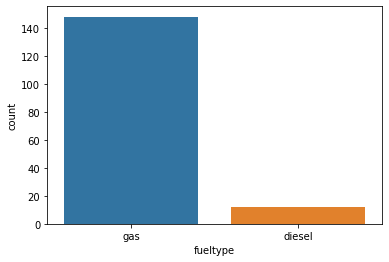

In [10]:
countplot('fueltype')

Berdasarkan plot di atas, terlihat bahwa yang tinggi frekuensinya adalah mobil dengan fuel type gas.

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

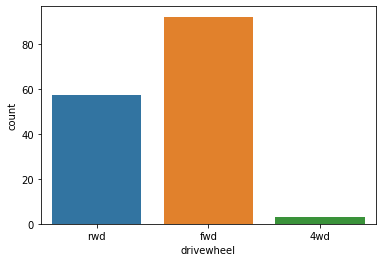

In [11]:
countplot('drivewheel')

Berdasarkan plot di atas, terlihat bahwa tipe drive wheel 4wd (Four Wheel Drive) paling sedikit.

<AxesSubplot:xlabel='carbody', ylabel='count'>

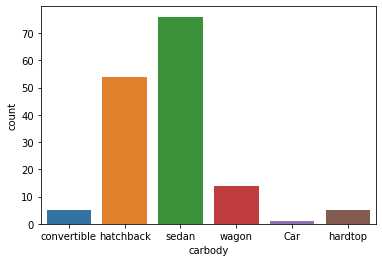

In [12]:
countplot('carbody')

Berdasarkan plot di atas, terlihat bahwa sedan merupakan tipe badan mobil terbanyak.

[]

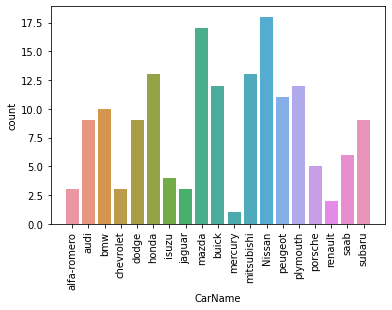

In [13]:
carnames = countplot('CarName')

carnames.set_xticklabels(carnames.get_xticklabels(), rotation=90)
carnames.plot()

Berdasarkan plot di atas, terlihat bahwa mobil Nissan berjumlah paling banyak dibanding mobil mercury yang berjumlah paling sedikit.

In [14]:
# Mendapatkan nilai korelasi (koefisien Person) atribut numerik, dengan method "corr"
car_corr = car_df.corr(method='pearson')

<AxesSubplot:>

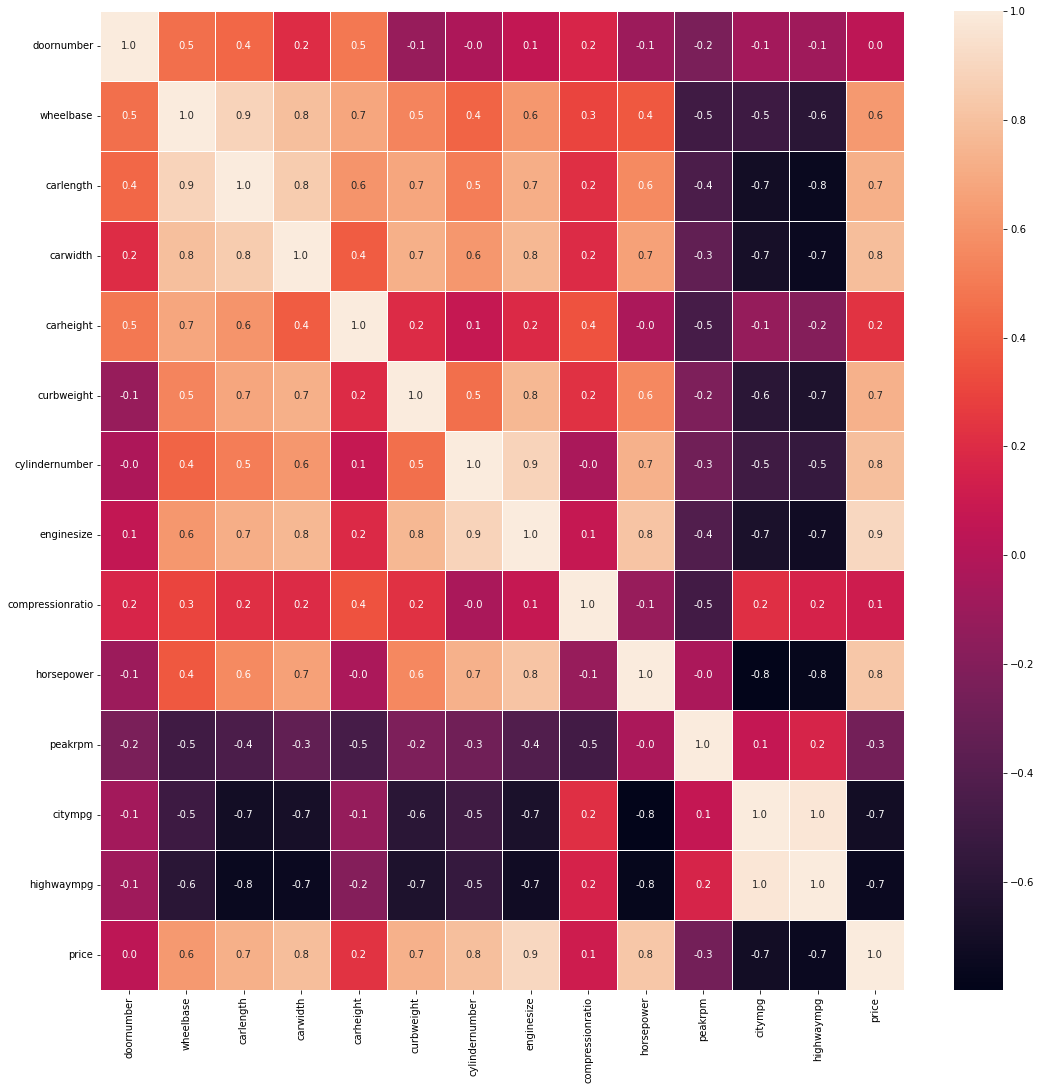

In [15]:
# heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(car_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Data Preprocessing

*Data Preparation* atau *data preprocessing* adalah suatu proses pembersihan dan transformasi pada *raw data* sebelum diproses dan dianalisis. Pada beberapa algoritma prediksi, dibutuhkan *preprocessing* khusus agar algoritma dapat berjalan dengan baik.

**DISCLAIMER!**  Pada contoh ini, *preprocessing* yang 
dilakukan dimaksudkan untuk algoritma yang memiliki karakteristik:
* sensitif terhadap outlier
* fitur-fiturnya perlu memiliki range yang setara

In [16]:
# Import data cars2
car2_df = pd.read_csv('D:\Backup\Kuliah\KASDD files\car2.csv')

In [17]:
# Menggabungkan dua data frame
frames = [car_df, car2_df] 
merged_cars = pd.concat(frames).reset_index(drop=True)

In [18]:
merged_cars.shape

(238, 22)

### **SOAL 1**

(a) Dari data merged_cars di atas, apakah terdapat redudansi data? Implementasikan dengan code!

In [19]:
# 1(a) Implementasi code di sini.
any(merged_cars.duplicated())

True

(b) Apa yang dapat Anda lakukan untuk menangani redudansi data tersebut? Implementasikan dengan code! Hint: [Dokumentasi Drop Duplicate](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.drop_duplicates.html)

In [20]:
# 1(b) Implementasi code di sini.
print(any(merged_cars.drop_duplicates().duplicated()))
display(merged_cars.drop_duplicates().shape)
print("27 data di drop")

False


(211, 22)

(c) Berikan alasan mengapa redudansi data perlu ditangani?
> Redundansi data mempengaruhi model dari data tersebut. Dengan adanya data yang duplikat, variabel descriptive statisticsnya pun berubah menjadi lebih terpusat di satu tempat sehingga perlu dihapus/diganti dengan mean

## Outlier

Outlier merupakan observasi yang tidak biasa yang muncul pada salah satu titik ekstrim dari sebagian besar data. Titik ekstrim di sini adalah nilai yang terlalu kecil atau nilai yang terlalu besar jika dibandingkan dengan sebagian besar nilai lain dalam kelompoknya.

Outlier dapat ditangani dengan melakukan hal-hal berikut ini:

*   Jika persentase outliers tidak signifikan, opsi yang mungkin dilakukan adalah drop column/row.
*   Jika datanya relatif sedikit, opsi yang mungkin dilakukan adalah mengisi dengan nilai statistik tertentu Pengisian data dapat dilakukan dengan:
  * Nilai rata-rata 
  * Nilai median
  * Nilai modus
*   Jika terdapat human error, maka opsi yang mungkin adalah memperbaiki dengan manual.
*   Jika asumsi data normal, maka outlier dapat dibiarkan saja.



<AxesSubplot:xlabel='price', ylabel='CarName'>

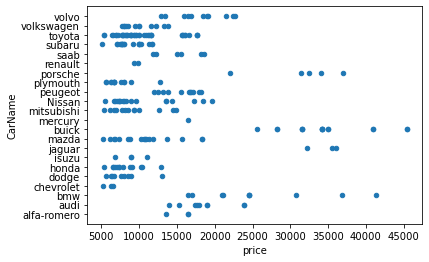

In [21]:
merged_cars['CarName'] = merged_cars['CarName'].astype(str) # ubah jadi tipe string
merged_cars.plot.scatter(x="price", y='CarName', figsize=(6,4))

Dari scatter plot di atas terlihat bahwa ada harga mobil yang sangat besar (outlier) pada mobil dengan tipe mobil mazda.

<AxesSubplot:>

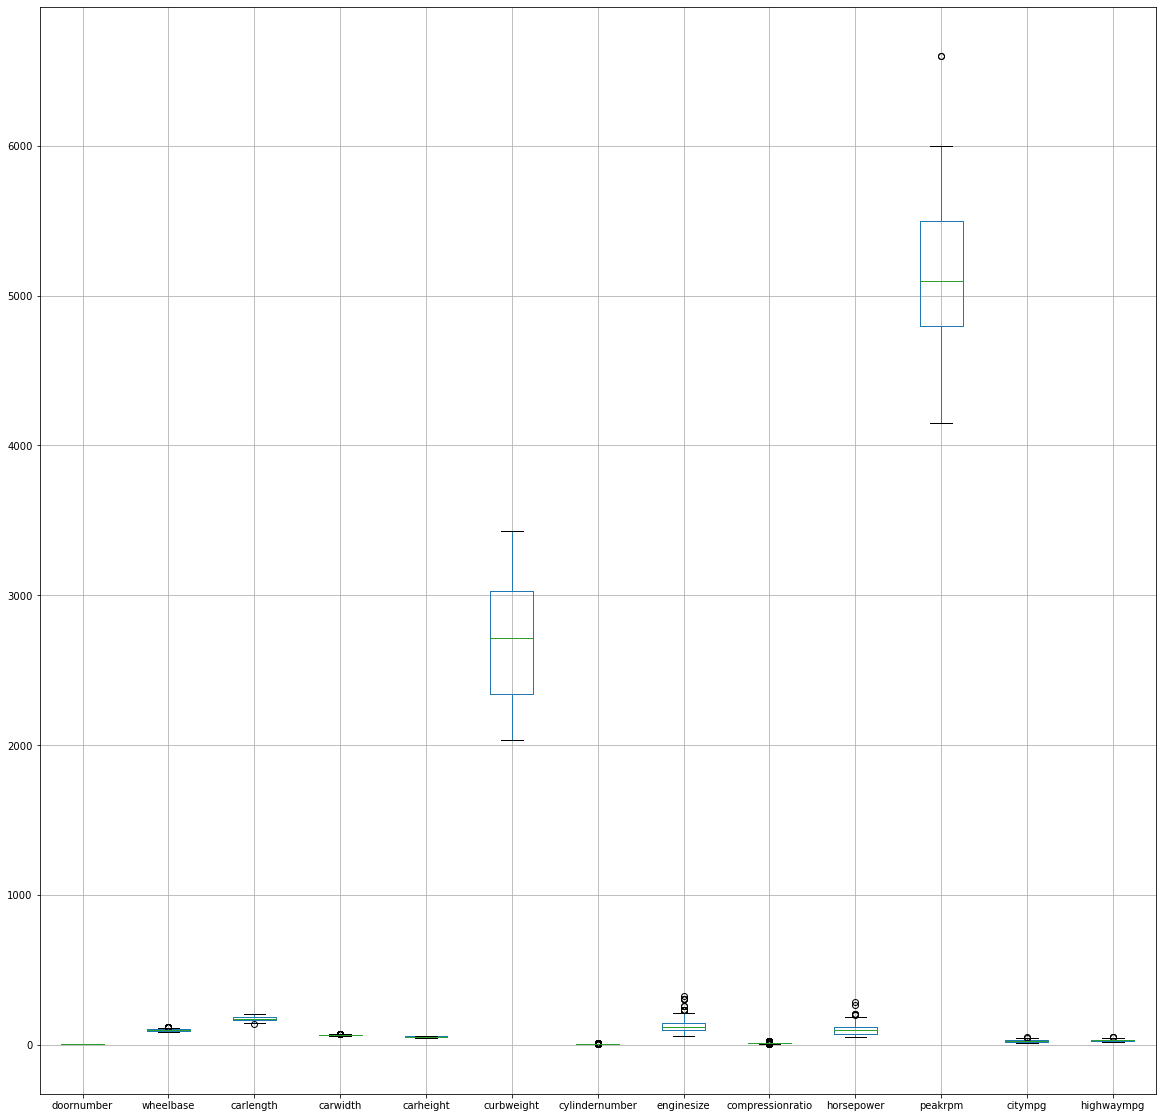

In [22]:
data = merged_cars.drop(['price'],axis=1)
data.boxplot(figsize=(20,20))

Boxplot juga dapat digunakan untuk menunjukkan adanya outlier. Bagian utama boxplot merupakan sebuah kotak Box yang menyajikan interquartile range (IQR). Garis yang merupakan perpanjangan dari box dinamakan dengan whiskers. Nilai yang berada di atas atau dibawah whisker dinamakan nilai outlier atau ekstrim.

### **SOAL 2**

(a) Dari boxplot yang Anda lihat, atribut apa yang mengandung outlier paling banyak?

> Cyllinder Number

(b) Implementasikan code untuk menampilkan banyaknya outlier pada atribut tersebut!

In [23]:
# 2(b) Implementasi code di sini
def outlier_amount(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - IQR * 1.5
    UB = Q3 + IQR * 1.5
    
    return data.loc[(data[column] < LB) | (data[column] > UB)][column].count()

print(outlier_amount('cylindernumber'))


52


(c) Apa yang dapat Anda lakukan untuk menangani outlier tersebut? Implementasikan dengan code!

> Asumsi bahwa kita perlu dataset untuk mengidentifikasi make suatu model dari data kolom yang ada. Bila begitu outlier yang ada kita biarkan dan mengumpulkan data lebih banyak lagi. Outlier yang ada penting karena menunjukkan adanya data diluar mayoritas dan perlunya pengumpulan ulang. Bila outlier tersebut didrop atau diganti dengan rata-rata, akan ada data yang hilang dari pengumpulannya.


## Missing Values

Terkadang data mungkin dalam format yang benar, tetapi beberapa nilainya hilang.

*   Nilai yang hilang terjadi ketika tidak ada nilai data yang disimpan untuk suatu variabel (fitur) dalam suatu observasi.
*   Biasanya missing value di datase muncul sebagai “?”, “T/A”, 0 atau hanya sel kosong.

Untuk menangani missing values, tidak terdapat jawaban tunggal yang selalu bekerja untuk semua skenario, karena  tentunya penanganan missing values harus disesuaikan dengan kondisi data atau fitur yang memiliki missing values. Namun, terdapat beberapa opsi umum yang dapat dipertimbangkan, yaitu: 

*   Periksa lagi dengan orang/kelompok yang mengumpulkan data.
*   Jika kita tidak mengetahui nilai yang hilang, opsi yang mungkin adalah menghapus/drop missing values.
    * Menghapus kolom yang mengandung missing values, atau 
    * Menghapus beberapa baris data yang mengandung missing values.
*  Jika data relatif sedikit, opsi yang mungkin adalah mengganti/replace nilai missing values. 
    * Mengganti nilai missing value dengan nilai mean keseluruhan variabel.
    * Jika variabelnya non-numerik, ganti nilai missing value dengan frekuensi/modus. 
*   Jika kita berasumsi data tersebut tetap akan berguna meskipun ada fitur yang hilang, maka kita dapat membiarkan missing values. 






In [24]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [25]:
cek_null(merged_cars)

                  Total   Percent
curbweight          194  0.815126
enginelocation       23  0.096639
drivewheel           20  0.084034
enginetype           19  0.079832
cylindernumber       19  0.079832
carheight            16  0.067227
compressionratio     10  0.042017
fuelsystem            6  0.025210
aspiration            5  0.021008
doornumber            5  0.021008
carbody               5  0.021008
enginesize            5  0.021008
carwidth              2  0.008403
carlength             2  0.008403
wheelbase             2  0.008403
fueltype              1  0.004202
horsepower            1  0.004202


Terdapat beberapa atribut memiliki null value yang sangat banyak, atribut body memiliki null value yang paling banyak hingga 81%, "curbweight"

In [26]:
# Melihat isi cabin (20 baris pertama)
merged_cars['curbweight'].head(20)

0     2548.0
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6     2844.0
7     2954.0
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
Name: curbweight, dtype: float64

In [27]:
# Drop atribut yang dianggap tidak penting
cars_cleaned = merged_cars.drop(['curbweight', 'peakrpm'], axis=1)
cars_cleaned.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,4.0,130.0,mpfi,9.0,111.0,21,27,13495.0
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,4.0,130.0,mpfi,9.0,111.0,21,27,16500.0
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,ohcv,6.0,152.0,mpfi,9.0,154.0,19,26,16500.0
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4.0,109.0,mpfi,10.0,102.0,24,30,13950.0
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,ohc,5.0,136.0,mpfi,8.0,115.0,18,22,17450.0


Atribut-atribut tersebut dianggap tidak penting berdasarkan pertimbangan, nalar, atau basic knowledge manusia. Sebagai contoh, apabila kita ingin mengukur survival rate penumpang Titanic, atribut nama pada dataset ini tidak mengindikasikan apakah dia survive apa tidak. Selain itu, ada beberapa atribut juga yang mungkin tidak akan mempengaruhi pengukuran tersebut. Sehingga atribut-atribut tersebut dapat didrop.


Atribut perlu didrop apabila:

*   Atribut tidak intuitif.
*   Atribut mempunyai banyak missing values.
*   Atribut tidak informatif.
*   Atribut dapat membahayakan untuk model tertentu.
*   Atribut tersebut dapat dihasilkan dari atribut yang lain.



Setelah atribut yang tidak penting dihapus, perlu ditangani atribut yang masih mengandung null value.

In [28]:
# Untuk atribut enginelocation, null value akan diisi dengan "front"
cars_cleaned['enginelocation'] = cars_cleaned['enginelocation'].fillna('front')

In [29]:
# Untuk atribut drivewheel, null value akan diisi dengan "4wd"
cars_cleaned['drivewheel'] = cars_cleaned['drivewheel'].fillna('4wd')

In [30]:
# Untuk atribut enginetype, null value akan diisi dengan "ohc"
cars_cleaned['enginetype'] = cars_cleaned['enginetype'].fillna('ohc')

In [31]:
# Untuk atribute "cylindernumber", null value akan diisi dengan nilai mode
col = ['cylindernumber']
for c in col:
    mode = int(cars_cleaned[~cars_cleaned.isna()].cylindernumber.mode())
    cars_cleaned[c] = cars_cleaned[c].fillna(mode)

In [32]:
# Untuk atribute "carheight", null value akan diisi dengan nilai median
col = ['carheight']
for c in col:
    median = int(cars_cleaned[~cars_cleaned.isna()].carheight.median())
    cars_cleaned[c] = cars_cleaned[c].fillna(median)

In [33]:
# Untuk atribute "compressionratio", null value akan diisi dengan nilai median
col = ['compressionratio']
for c in col:
    median = int(cars_cleaned[~cars_cleaned.isna()].compressionratio.median())
    cars_cleaned[c] = cars_cleaned[c].fillna(median)

In [34]:
cek_null(cars_cleaned)

            Total   Percent
fuelsystem      6  0.025210
aspiration      5  0.021008
doornumber      5  0.021008
carbody         5  0.021008
enginesize      5  0.021008
wheelbase       2  0.008403
carlength       2  0.008403
carwidth        2  0.008403
fueltype        1  0.004202
horsepower      1  0.004202


In [35]:
# Hapus baris yang atribute "fare" bernilai null
cars_cleaned.dropna(inplace=True)

In [36]:
cars_cleaned.shape

(216, 20)

In [37]:
cars_cleaned.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,4.0,130.0,mpfi,9.0,111.0,21,27,13495.0
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,4.0,130.0,mpfi,9.0,111.0,21,27,16500.0
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,ohcv,6.0,152.0,mpfi,9.0,154.0,19,26,16500.0
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4.0,109.0,mpfi,10.0,102.0,24,30,13950.0
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,ohc,5.0,136.0,mpfi,8.0,115.0,18,22,17450.0


## Label Encoding

In [38]:
merged_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           238 non-null    object 
 1   fueltype          237 non-null    object 
 2   aspiration        233 non-null    object 
 3   doornumber        233 non-null    float64
 4   carbody           233 non-null    object 
 5   drivewheel        218 non-null    object 
 6   enginelocation    215 non-null    object 
 7   wheelbase         236 non-null    float64
 8   carlength         236 non-null    float64
 9   carwidth          236 non-null    float64
 10  carheight         222 non-null    float64
 11  curbweight        44 non-null     float64
 12  enginetype        219 non-null    object 
 13  cylindernumber    219 non-null    float64
 14  enginesize        233 non-null    float64
 15  fuelsystem        232 non-null    object 
 16  compressionratio  228 non-null    float64
 1

In [39]:
# Melakukan label encoding, untuk mengubah data kategorikal bertipe string ke numeric value
col = cars_cleaned.select_dtypes(include=["object"]).columns

for c in col:
    if len(cars_cleaned[c].value_counts()) <= 28:
        le = LabelEncoder() 
        le.fit(list(cars_cleaned[c].values)) 
        cars_cleaned[c] = le.transform(list(cars_cleaned[c].values))

In [40]:
cars_cleaned.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,horsepower,citympg,highwaympg,price
0,1,1,0,2.0,1,2,0,88.6,168.8,64.1,48.8,0,4.0,130.0,5,9.0,111.0,21,27,13495.0
1,1,1,0,2.0,1,2,0,88.6,168.8,64.1,48.8,0,4.0,130.0,5,9.0,111.0,21,27,16500.0
2,1,1,0,2.0,3,2,0,94.5,171.2,65.5,52.4,5,6.0,152.0,5,9.0,154.0,19,26,16500.0
3,2,1,0,4.0,4,1,0,99.8,176.6,66.2,54.3,3,4.0,109.0,5,10.0,102.0,24,30,13950.0
4,2,1,0,4.0,4,0,0,99.4,176.6,66.4,54.3,3,5.0,136.0,5,8.0,115.0,18,22,17450.0


In [41]:
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 237
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           216 non-null    int32  
 1   fueltype          216 non-null    int32  
 2   aspiration        216 non-null    int32  
 3   doornumber        216 non-null    float64
 4   carbody           216 non-null    int32  
 5   drivewheel        216 non-null    int32  
 6   enginelocation    216 non-null    int32  
 7   wheelbase         216 non-null    float64
 8   carlength         216 non-null    float64
 9   carwidth          216 non-null    float64
 10  carheight         216 non-null    float64
 11  enginetype        216 non-null    int32  
 12  cylindernumber    216 non-null    float64
 13  enginesize        216 non-null    float64
 14  fuelsystem        216 non-null    int32  
 15  compressionratio  216 non-null    float64
 16  horsepower        216 non-null    float64
 1

## Preparation for Machine Learning

Misalkan kita diberikan tugas untuk melakukan prediksi berapa harga sebuah mobil. Atribut yang menjadi target adalah "price", sedangkan atribut lainnya menjadi *predictor* (fitur yang akan menentukan hasil prediksi).

Beberapa pemrosesan yang dapat dilakukan sebelum data kita dimasukkan ke dalam algoritma *machine learning* di antaranya (tapi tidak terbatas pada):
* Memisahkan atribut target dan atribut *predictor*
* Melakukan normalisasi jika diperlukan
* Memisahkan data menjadi data *training* dan *testing* (Akan dibahas pada beberapa Lab selanjutnya)

In [42]:
# Memisahkan atribut target (Y) dengan atribut predictor (X)
X = cars_cleaned.drop('price', axis=1)
Y = cars_cleaned['price']

### **SOAL 3**

(a) Lakukan normalisasi pada X. Implementasikan dengan code! Hint: [Dokumentasi Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [43]:
# 3(a) Implementasi code di sini
from sklearn import preprocessing

normalized = preprocessing.Normalizer(norm='l1')
display(normalized.transform(X))

D:\Backup\Kuliah\KASDD\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


array([[0.00146135, 0.00146135, 0.        , ..., 0.16220956, 0.03068829,
        0.03945638],
       [0.00146135, 0.00146135, 0.        , ..., 0.16220956, 0.03068829,
        0.03945638],
       [0.00130107, 0.00130107, 0.        , ..., 0.2003643 , 0.02472027,
        0.03382774],
       ...,
       [0.02538992, 0.00120904, 0.        , ..., 0.16201185, 0.02176279,
        0.027808  ],
       [0.0264717 , 0.        , 0.00126056, ..., 0.13361906, 0.03277449,
        0.03403504],
       [0.02706883, 0.00128899, 0.00128899, ..., 0.14694509, 0.02449085,
        0.0322248 ]])

(b) Bentuk normalisasi apa yang Anda pilih? Apa alasannya? 

> Saya memilih normalisasi l1. Karena normalisasi l1 cenderung mengecilkan data dan membuatnya lebih cocok untuk feature selection.

(c) Menurut Anda, mengapa normalisasi perlu dilakukan? 
> Normalisasi dapat mengatasi masalah di mana salah satu dari kedua parameter memiliki range yang jauh lebih besar dibandingkan range yang kedua. Selain itu normalisasi juga dapat mempercepat Learning Time karena range kedua parameter sudah disesuaikan

## 2. Principal Component Analysis

# Dimensionality Reduction (PCA)

Library `scikit-learn` telah menyediakan modul `decomposition` yang dapat digunakan untuk melakukan PCA. Cara kerja PCA pada library ini serupa dengan step by step yang telah dilakukan pada bagian sebelumnya.


Dokumentasi lebih lanjut dapat dilihat di https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [44]:
# Import modul PCA
from sklearn.decomposition import PCA 

In [45]:
# gunakan data iris dari sklearn
from sklearn.datasets import load_iris
iris = load_iris()


iris_df = pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [46]:
# features=['sepal_length','sepal_width','petal_length','petal_width']
# x=iris['feature_names']
# y=iris.species

iris_df.shape

(150, 4)

### Scaling

In [47]:
# initialize PCA
pca = PCA()  

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_df)

StandardScaler()

In [49]:
scaled_data = scaler.transform(iris_df)

In [50]:
# Fit the model with "scaled_data".
pca.fit(scaled_data)

PCA()

In [51]:
trans_pca = pca.transform(scaled_data)

In [52]:
trans_pca.shape

(150, 4)

In [53]:
# explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

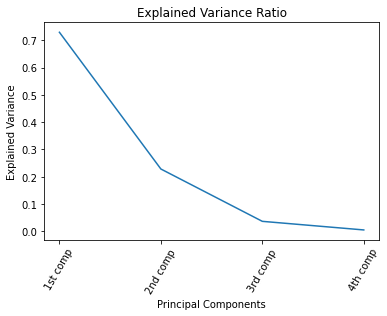

In [54]:

plt.plot(range(0,4), explained_variants)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(0,4),
           ["1st comp", "2nd comp", "3rd comp", "4th comp"], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()

Dari grafik, dapat terlihat Principle Components sudah merangkap 95% variance data

In [55]:
from numpy.random import rand

# Inverse PCA menggunakan satu component saja
def inverse_pca(pca_data, pca, remove_n):
    transformed = pca_data.copy()
    transformed[:, -remove_n:] = 0 
    return pca.inverse_transform(transformed)

LL = inverse_pca(trans_pca, pca, 1)

Text(0, 0.5, 'Original sepal width')

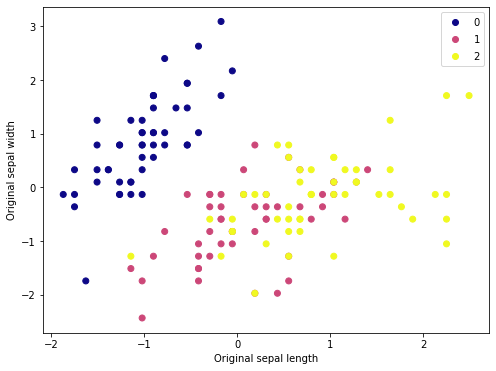

In [56]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(scaled_data[:,0],scaled_data[:,1],c=iris['target'], cmap='plasma')
plt.legend(*scatter.legend_elements())
plt.xlabel('Original sepal length')
plt.ylabel('Original sepal width')

# Blue: Setosa
# Pink: Versicolor
# Yellow: Virginica

Text(0, 0.5, 'LL sepal width')

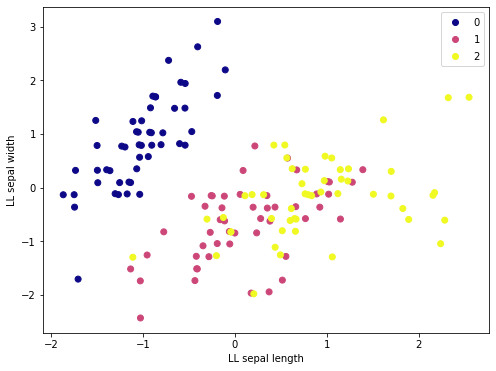

In [57]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(LL[:,0],LL[:,1],c=iris['target'], cmap='plasma')
plt.legend(*scatter.legend_elements())
plt.xlabel('LL sepal length')
plt.ylabel('LL sepal width')

# Blue: Setosa
# Pink: Versicolor
# Yellow: Virginica

Text(0, 0.5, 'Original petal width')

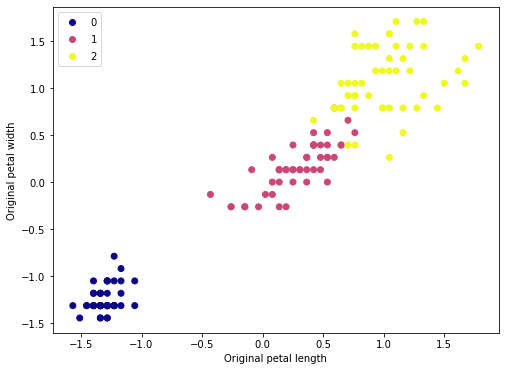

In [58]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(scaled_data[:,2],scaled_data[:,3],c=iris['target'], cmap='plasma')
plt.legend(*scatter.legend_elements())
plt.xlabel('Original petal length')
plt.ylabel('Original petal width')

# Blue: Setosa
# Pink: Versicolor
# Yellow: Virginica

Text(0, 0.5, 'LL petal width')

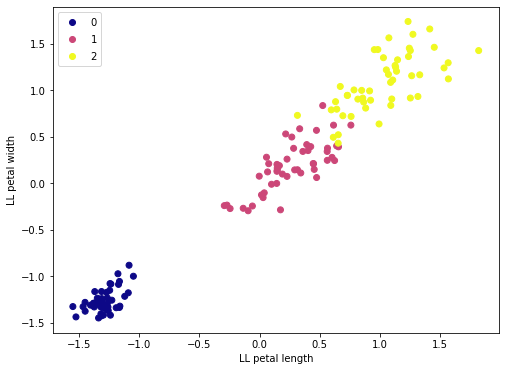

In [59]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(LL[:,2],LL[:,3],c=iris['target'], cmap='plasma')
plt.legend(*scatter.legend_elements())
plt.xlabel('LL petal length')
plt.ylabel('LL petal width')

# Blue: Setosa
# Pink: Versicolor
# Yellow: Virginica

Dari keempat scatter plot, kita dapat lihat bahwa grafik original data dan LL relatif mirip. Hal ini dikarenakan data yang hilang setelah melakukan PCA tidak terlalu signifikan. 

Text(0, 0.5, 'PCA sepal width')

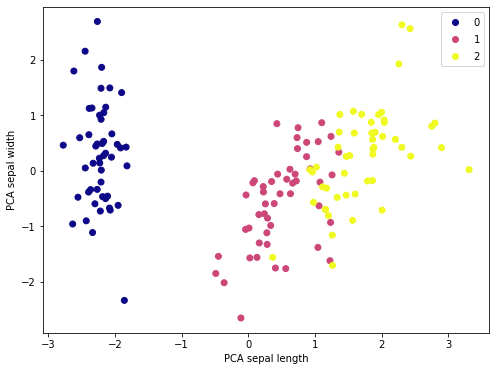

In [60]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(trans_pca[:,0],trans_pca[:,1],c=iris['target'], cmap='plasma')
plt.legend(*scatter.legend_elements())
plt.xlabel('PCA sepal length')
plt.ylabel('PCA sepal width')

# Blue: Setosa
# Pink: Versicolor
# Yellow: Virginica

Text(0, 0.5, 'PCA sepal width')

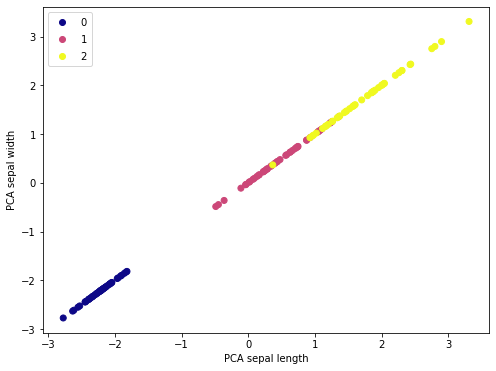

In [61]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(trans_pca[:,0],trans_pca[:,0],c=iris['target'], cmap='plasma')
plt.legend(*scatter.legend_elements())
plt.xlabel('PCA sepal length')
plt.ylabel('PCA sepal width')

# Blue: Setosa
# Pink: Versicolor
# Yellow: Virginica

Sedangkan untuk data yang menggunakan principle components menunjukkan 3 cluster berbeda

## SOAL 4

(a) Berdasarkan contoh implementasi PCA diatas, jelaskan tiap step yang dilakukan
> Pertama dilakukan standardisasi terhadap nilai yang ada. Ini terjadi pada ```trans_pca = pca.transform(scaled_data)```. Pada bagian ```explained_variants``` dilihat kalau 1st dan 2nd component sudah mencakupi 95% variance sehingga kita bisa menggunakan 1st dan 2nd component saja. Setelah data dinormalisasi dan dimasukkan ke dalam fungsi ```inverse_pca(pca_data, pca, remove_n)``` yang akan menghapus data kolom ke ```scaled_data``` dan mengubahnya menjadi data dengan dimensi yang sebelumnya kembali. Scatterplot yang ada kemudian menunjukka perbandingan dari data yang di drop pada kolom terakhir dan yang original.

(b) Menurut Anda, kapan PCA perlu dilakukan? 
> PCA perlu dilakukan bila suatu data memiliki terlalu banyak kolom dan perlu dikecilkan tanpa menghilangkan data penting

(c) Menurut Anda, bagaimana hasil transformasi PCA menggunakan 1 dan 2 principal component pada dastaset iris ini? 
> Transformasi PCA pada kedua komponen membuat scatterplot yang tetap terlihat seperti suatu scatterplot dengan data yang original. Dengan ini kita dapat mengurangi dimensi dari fitur dan tetap mendapatkan data yang akurat